# What is Categorical Data

Categorical variables are those values which are selected from a group of categories or
labels. Typically, any data attribute which is categorical in nature represents discrete values which belong to a specific finite set of categories or classes. These are also often known as classes or labels in the context of attributes or variables which are to be predicted by a model (popularly known as response variables). These discrete values can be text or numeric in nature (or even unstructured data like images!).

#### There are two major classes of categorical data, nominal and ordinal.

In any nominal categorical data attribute, there is no concept of ordering amongst the values of that attribute. Consider a simple example of weather categories like - sunny, cloudy, rainy etc. These are without any concept or notion of order (windy doesn’t always occur before sunny nor is it smaller or bigger than sunny).

 For example, the variable may be “color” and may take on the values “red,” “green,” and “green.” Or the variable Gender with the values of male or female is categorical, and so is the variable marital status with the values of never married, married, divorced, or widowed.

Another example, in survey about preferred brand of car they owned, the result would be categorical (e.g. Tesla, Toyota, Ford, None, etc.). Responses fall into a fixed set of categories.

**Ordinal categorical** attributes have some sense or notion of order amongst its values. For instance say shirt sizes. It is quite evident that order or in this case ‘size’ matters when thinking about shirts (S is smaller than M which is smaller than L and so on).

---

I will get error if you try to plug these variables into most machine learning models without "encoding" them first.

Almost all Machine learning and deep learning neural networks algorithms require that input and output variables are numbers, requiring that categorical data must be encoded to numbers before we can use it to feed to models and evaluate a model.

There are quite a few techniques to encode categorical variables for modeling, although the three most common are as follows:

- Integer Encoding: Where each unique label is mapped to an integer.

- One Hot Encoding: Where each label is mapped to a binary vector.

- Learned Embedding: Where a distributed representation of the categories is learned.

In some categorical variables, the labels have an intrinsic order, for example, in the variable Student's grade, the values of A, B, C, or Fail are ordered, A being the highest grade and Fail the lowest. These are called ordinal categorical variables. Variables in which the categories do not have an intrinsic order are called nominal categorical variables, such as the variable City, with the values of London, Manchester, Bristol, and so on.

The values of categorical variables are often encoded as strings. Scikit-learn, does not support strings as values, therefore, we need to transform those strings into numbers. The act of replacing strings with numbers is called categorical encoding.

# Various encoding techniques categorical variable 


### One Hot Coding

One Hot Coding is the most widely used coding scheme. It compares each level of the categorical variable to a fixed reference level. One hot encoding transforms a single variable with n observations and d distinct values, to d binary variables
with n observations each. Each observation indicating the presence (1) or absence (0) of the dichotomous binary variable.


### Ordinal Coding

In ordinal encoding, an integer is assigned to each category, provided the number of existing categories are known. It does not add any new columns to the data, but implies an order to the variable that may not actually exist.


### Sum Coding

Sum coding compares the mean of the dependent variable for a given level to the overall mean of the dependent variable over all the levels. That is, it uses contrasts between each of the first k − 1 levels and level k in this example, level 1 is
compared to all the others, level 2 to all the others, and level 3 to all the others.

### Helmert Coding

Helmert Coding compares each level of a categorical variable to the mean of the subsequent levels.


### Polynomial Coding

Polynomial coding is a form of trend analysis that looks for linear, quadratic and cubic trends in the categorical variable. This type of coding system should be used only with an ordinal variable in which the levels are equally spaced.


### Backward Difference Coding

In this coding system, the mean of the dependent variable for one level of the categorical variable is compared to the mean of the dependent variable for the prior adjacent level.


### Binary Coding

In binary coding, first the categories are encoded as ordinal, then those integers are converted into binary code, then the digits from that binary string are split into separate columns.


---

# One-hot Encoding

One-hot encoding is where you represent each possible value for a category as a separate feature.

In one-hot encoding, we represent a categorical variable as a group of binary variables, where each binary variable represents one category. The binary variable indicates whether the category is present in an observation (1) or not (0).

One hot encoding is the most widespread approach, and it works very well unless our categorical variable takes on a large number of values (e.g. more than 20 different values). 

#### The following table shows the one-hot encoded representation of the Gender variable with the categories of Male and Female:


![img](https://i.imgur.com/5td19b8.jpg)

Another example with a variable named 'color'. The values in the variable are Red, Yellow and Green. And then we create a separate column for each possible value. Wherever the original value was Red, we put a 1 in the Red column.

![img](https://i.imgur.com/kdltIHI.png)

From the above Gender variable, we can derive the binary variable of Female, which shows the value of 1 for females, or the binary variable of Male, which takes the value of 1 for the males in the dataset.
For the categorical variable of Color with the values of red, green, and green, we can create three variables called red, green, and green. These variables will take the value of 1 if the
observation is red, green, or green, respectively, or 0 otherwise.

#### A categorical variable with k unique categories can be encoded in k-1 binary variables. 

For Gender, k is 2 as it contains two labels (male and female), therefore, we need to create only one binary variable (k - 1 = 1) to capture all of the information. For the color variable, which has three categories (k=3; red, green, and green), we need to create two (k - 1 = 2) binary variables to capture all the information, so that the following occurs:

- If the observation is red, it will be captured by the variable red (red = 1, green = 0).

- f the observation is green, it will be captured by the variable green (red = 0, green = 1).

- If the observation is green, it will be captured by the combination of red and green (red = 0, green = 0).

There are a few occasions in which we may prefer to encode the categorical variables with k binary variables:

- When training decision trees, as they do not evaluate the entire feature space at the same time
- When selecting features recursively
- When determining the importance of each category within a variable

In [1]:
!pip install -U feature-engine
# The above line for installing feature_engine in Kaggle

'''
Note on installing and using feature_engine package

Feature-engine is in active development regularly publishing new or updated transformers. To upgrade Feature-engine to the latest version, use pip like this:

$ pip install -U feature-engine

In new version (1.0), you need to import categorical encoders from feature_engine.encoding as below

from feature_engine.encoding import OneHotEncoder

The format below is not used anymore :

from feature_engine import categorical_encoders as ce

https://feature-engine.readthedocs.io/en/1.0.x/index.html

'''

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from feature_engine.encoding import OrdinalEncoder as oe
from feature_engine.encoding import OneHotEncoder as ohe

from IPython.display import display # Allows the use of display() for DataFrames

import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 205 kB 4.8 MB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
breast_cancer_df = pd.read_csv('../input/breast-cancer-data/breast-cancer.data')
print('Breast Cancer df number of rows and columns are ', breast_cancer_df.shape)

Breast Cancer df number of rows and columns are  (285, 10)


In [3]:
# Replace the question marks in the dataset with NumPy NaN values:
breast_cancer_df = breast_cancer_df.replace('?', np.nan)

In [4]:
# Create a list with the variable names:
# There are 10 columns as we know the from the shape of the dataframe
# So create list of 10 column-headings starting with 'A1' and ending with 'A-10'
# Meaning I have to traverser a range of 1 to 11
column_labels = ['A' + str(s) for s in range(1, 11)]
column_labels

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']

In [5]:
# Now assign the above list of as column-label
breast_cancer_df.columns = column_labels

In [6]:
# Make lists with categorical and numerical variables:

category_columns = [c for c in breast_cancer_df.columns if breast_cancer_df[c].dtypes == 'O' ]
numeric_columns = [c for c in breast_cancer_df.columns if breast_cancer_df[c].dtypes != 'O' ]

print('breast_cancer_category_columns ', category_columns)
print('breast_cancer_numeric_columns ', numeric_columns)

breast_cancer_category_columns  ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A8', 'A9', 'A10']
breast_cancer_numeric_columns  ['A7']


From the above we see that column 'A7' is the Numeric Column and the, rest all are categorical column.
Now, re-cast numerical variables to float types:

In [7]:
breast_cancer_df['A7'] = breast_cancer_df['A7'].astype(float)

---

## Binary encoding - Re-code the target variable as binary:
Binary encodings are a special case of category features. Here's a way to do this, do it to the column label of 'A10'. That is making each 'yes' as 1 and each 'no' as 0 (zero)

In [8]:
breast_cancer_df['A10'] = breast_cancer_df['A10'].map({'yes':1, 'no':0})
breast_cancer_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2.0,right,right_up,0
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2.0,left,left_low,0
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2.0,right,left_up,0
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2.0,right,right_low,0
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2.0,left,left_low,0


In [9]:
# Fill in the missing data
breast_cancer_df[numeric_columns] =  breast_cancer_df[numeric_columns].fillna(0)
breast_cancer_df[category_columns] = breast_cancer_df[category_columns].fillna(0)

In [10]:
# separate the data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_df.drop(labels=['A10'], axis=1), breast_cancer_df['A10'], test_size=0.3, random_state=0)

In [11]:
#  Let's inspect the unique categories of the A3 variable
X_train['A3'].unique()

array(['ge40', 'premeno', 'lt40'], dtype=object)

So I have the unique values as

array(['ge40', 'premeno', 'lt40'], dtype=object)

---

# one-hot encoding using pandas get_dummies()

Let's encode A3 into k-1 binary variables using pandas and then inspect the first five rows of the resulting dataframe:

In [12]:
tmp_1 = pd.get_dummies(X_train['A3'], drop_first=True)
tmp_1.head()

,lt40,premeno
18,0,0
156,0,1
235,0,1
233,0,0
234,0,1


In [13]:
tmp_2 = pd.get_dummies(X_train['A3'], drop_first=False)
tmp_2.head()

,ge40,lt40,premeno
18,1,0,0
156,0,0,1
235,0,0,1
233,1,0,0
234,0,0,1


`get_dummies` pandas function converts categorical variables into indicator variables and  ignores missing data, unless we specifically indicate otherwise, in which case, it will return missing data as an additional category

 To encode the variable into k binaries, use instead `drop_first=False`.

From the output above we can see each label is now a binary variable and there's two (because we used k - 1 ) new columns for the label-names.

To understand how the get_dummies() implementation take a look at the below code

In [14]:
df = pd.DataFrame({'country': ['russia', 'germany', 'australia','korea']})
df_get_dummied = pd.get_dummies(df['country'], prefix='country')
df_get_dummied

,country_australia,country_germany,country_korea,country_russia
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,0,1,0


![img](https://i.imgur.com/DgTHD0B.jpg)

To encode all categorical variables at the same time, let's first make a list with their names: i.e.
 - I am excluding A7 (which is numerical data) and
 - A10 (which is the target variable and I have make it to be binary previously.
 - Also excluding all the age ranges i.e 'A2', 'A4', 'A5', 'A8'

In [15]:
vars_categorical = ['A1', 'A3', 'A6', 'A8', 'A9' ]

# Now, let's encode all of the categorical variables into k-1 binaries each, capturing the result in a new dataframe:

X_train_dummy_encoded_pandas = pd.get_dummies(X_train[vars_categorical], drop_first=True)
X_test_dummy_encoded = pd.get_dummies(X_test[vars_categorical], drop_first=True )

X_train_dummy_encoded_pandas.head()

,A1_recurrence-events,A3_lt40,A3_premeno,A6_no,A6_yes,A8_right,A9_left_low,A9_left_up,A9_right_low,A9_right_up
18,0,0,0,1,0,1,0,0,0,1
156,0,0,1,1,0,0,0,0,0,0
235,1,0,1,1,0,1,1,0,0,0
233,1,0,0,1,0,1,0,1,0,0
234,1,0,1,0,1,0,1,0,0,0


So as we can see above, the pandas' `get_dummies()` function will create one binary variable per found category. Hence, if there are more categories in the train set than in the test set, get_dummies() will return more columns in the transformed train set than in the transformed test set.

---

# Now one-hot encoding using scikit-learn

First, Create a label (category) encoder object with LabelEncoder() which is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1.

#### Why we need Label Encoding

Datasets in Machine Learning, usually contains multiple labels in one or more than one columns. These labels can be in the form of words, to make the data understandable i.e. to keep it in human readable form.

Label Encoding refers to converting these labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [16]:
example_df = pd.DataFrame(['India', 'Australia', 'USA'], columns= ['Country'])
example_df

,Country
0,India
1,Australia
2,USA


---

## A note on `fit()/fit_transform()/transform()` from scikit-learn

Both `fit_transform()` and `transform()` are the methods of class **[sklearn.preprocessing.StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn-preprocessing-standardscaler)** and used almost together while scaling or standardizing our training and test data.

#### The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

- Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1.

- Ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.

- In sklearn.preprocessing.StandardScaler(), Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

- fit_transform(X[, y]) => Fit to data, then transform it. Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X. fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data. The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.


- transform(X[, copy]) => Perform standardization by centering and scaling. We call `fit_transform()` method on our training data and `transform()` method on our test data. Using the `transform()` method we can use the same mean and variance as it is calculated from our training data to transform our test data. Thus, the parameters learned by our model using the training data will help us to transform our test data.

So in further simple words - every sklearn's transform's `fit()` just calculates the parameters (e.g. Mean and Sigma in case of StandardScaler) and saves them as an internal objects state. Afterwards, we can call its `transform()` method to apply the transformation to a particular set of examples.

`fit_transform()` joins these two steps and is used for the initial fitting of parameters on the training set x, but it also returns a transformed x. Internally, it just calls first `fit()` and then `transform()` on the same data.

#### How do we do Numeric encoding from the above DataFrame for the Country feature?

Ans is - with Scikit learn transformation, called `LabelEncoder()`:

In [17]:
example_df['Country_encoded'] = LabelEncoder().fit_transform(example_df['Country'])
example_df

,Country,Country_encoded
0,India,1
1,Australia,0
2,USA,2


Let's take a closer look at what the LabelEncoder is doing

In [18]:
encoder = LabelEncoder()
encoder.fit(example_df['Country'])
encoder.classes_

array(['Australia', 'India', 'USA'], dtype=object)

Given the output - array(['Australia', 'India', 'USA'], dtype=object)

We see that the ordering of the list of classes above corresponds to their numeric values. Transformation is then as follows:


#### Now apply LabelEncoder() to our Breast-Cancer dataset

In [19]:
enc = LabelEncoder()

enc.fit(vars_categorical)

# View the labels (if you want)
print("label (category) encoder List: ", list(enc.classes_))
# ['A1', 'A3', 'A6', 'A8', 'A9']

new_cat_features = enc.transform(vars_categorical)
print(new_cat_features) # [0 1 2 3 4]

new_cat_features = new_cat_features.reshape(-1, 1)

label (category) encoder List:  ['A1', 'A3', 'A6', 'A8', 'A9']
[0 1 2 3 4]


Then create a OneHotEncoder transformer that encodes into k-1 binary variables and returns a NumPy array:

Scikit-learn's `OneHotEncoder()` function will only encode the categories learned from the train set. If there are new categories in the test set, we can instruct the encoder to ignore them or to return an error with the `handle_unknown='ignore'` argument or the `handle_unknown='error'` argument, respectively.

setting the `categories='auto'` argument so that the transformer learns the categories to encode from the train set; `drop='first'` so that the transformer drops the first binary variable, returning k-1 binary features per categorical variable; and sparse=False so that the transformer returns a NumPy array (the default is to return a sparse matrix).

Now, let's create the NumPy arrays with the binary variables for train and test sets:

In [20]:
ohe_scikit = OneHotEncoder(sparse=False, categories='auto', drop='first')

#### Now fit i.e. make scikit_learn to learn the encoder to a slice of the train set with the categorical variables so it identifies the categories to encode:

In [21]:
output = ohe_scikit.fit_transform(new_cat_features)
print(output)

[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Unfortunately, the feature names are not preserved in the NumPy array, therefore, identifying which feature was derived from which variable is not straightforward.

The beauty of pandas' `get_dummies()` function is that it returns feature names that clearly indicate which variable and which category each feature represents. On the downside, `get_dummies()` does not persist the information learned from the train set to the test set.

Contrarily, scikit-learn's `OneHotEncoder()` function can persist the information from the train set, but it returns a NumPy array, where the information about the meaning of the features is lost.

Scikit-learn's `OneHotEncoder()` function will create binary indicators from all variables in the dataset, so be mindful not to pass numerical variables when fitting or transforming your datasets.

---

#  Implement one-hot encoding with Feature-engine

`Feature-engine` has multiple advantages:

- first, it allows us to select the variables to encode directly in the transformer.
- Second, it returns a pandas dataframe with clear variable names, and
- third, it preserves the information learned from the train set, therefore returning the same number of columns in
both train and test sets.

#### With that, Feature-engine overcomes the limitations of pandas' `get_dummies()` method and scikit-learn's `OneHotEncoder()` class.

From its [documentation](https://feature-engine.readthedocs.io/en/latest/encoders/OneHotCategoricalEncoder.html)

The OneHotCategoricalEncoder() replaces categorical variables by a set of binary variables, one per unique category. The encoder has the option to create k or k-1 binary variables, where k is the number of unique categories.

The encoder can also create binary variables for the n most popular categories, n being determined by the user. This means, if we encode the 6 more popular categories, we will only create binary variables for those categories, and the rest will be dropped.

The OneHotCategoricalEncoder() works only with categorical variables. A list of variables can be indicated, or the encoder will automatically select all categorical variables in the train set.

In [22]:
# one_hot_enc_feature_engine = ce.OneHotCategoricalEncoder(top_categories=None, drop_last=True)
one_hot_enc_feature_engine = ohe(top_categories=None, drop_last=True)

#### Now, once we have the encoder object, we can encode our data using the fit()/transform() or the fit_transform() methods

With top_categories=None, we indicate that we want to encode all of the categories present in the categorical variables.

This breast-cancer data set above only has few categories, but what if it had 300 ? That's when, top_categories becomes very useful, which has the effect of collapsing the into a more manageable number. For example, you could set the top_categories to 10 and that would get you the 10 most frequently occurring category columns and all others would be collapsed into an “other” column.

Feature-engine detects the categorical variables automatically. To encode only a subset of the categorical variables, we can pass the variable names in a list like below:

`one_hot_enc_feature_engine = ce.OneHotCategoricalEncoder(variables=['A1', 'A4'])`

Since the `OneHotCategoricalEncoder` uses the `fit()/fit_transform()/transform()` from **scikit-learn**, it can be used in a Pipeline object. Finally, and perhaps most important to me, is that the OneHotCategoricalEncoder returns a pandas DataFrame rather than numpy arrays or other sparse matrices. The reason this mattered to me was that I wanted to see which categorical columns actually are adding value to the model and which are not. Doing this from a numpy array without column references is exceedingly difficult.

Now, let's fit the encoder to the train set so that it learns the categories and variables to encode:

In [23]:
one_hot_enc_feature_engine.fit(X_train)

# Let's encode the categorical variables in train and test sets, and display the first five rows of the encoded train set:

X_train_enc_feature_engine = one_hot_enc_feature_engine.transform(X_train)
X_test_enc_feature_engine = one_hot_enc_feature_engine.transform(X_test)

X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9
18,no-recurrence-events,50-59,ge40,30-34,0-2,no,1.0,right,right_up
156,no-recurrence-events,50-59,premeno,30-34,0-2,no,1.0,left,central
235,recurrence-events,40-49,premeno,25-29,0-2,no,2.0,right,left_low
233,recurrence-events,60-69,ge40,30-34,0-2,no,3.0,right,left_up
234,recurrence-events,50-59,premeno,25-29,3-5,yes,3.0,left,left_low


---

## one-hot encoding of frequent categories

#### What is high cardinality of a dataset.

A dataset which has columns(feature) with high number of unique values. Another way to refer to variables that have a multitude of categories, is to call them variables with high cardinality. If we have categorical variables containing many multiple labels or high cardinality,then by using one hot encoding, we will expand the feature space dramatically, which is not an ideal situation to be in.

One approach used by many in Kaggle competitions, is to replace each label of the categorical variable by the count, this is the amount of times each label appears in the dataset. Or the frequency, this is the percentage of observations within that category.

But the the cost of the above strategy is some loss of information, because I am effectively turning a categorical feature into a "popularity" feature.

Check the "Count Encoding" section on [this link](https://www.kaggle.com/matleonard/categorical-encodings)

While dealing with highly cardinal dataset, one thing to ensure that the cardinality of the categorical information in the training set resembles that in the test/validation sets. That is, if I have a feature with values {A,A,A,B,C,C,D} in train, but test only has {A,B,B}, then eliminating the C and D records, and undersampling the A or oversampling the B records may resist overfitting. Also, for individual featuers with low cardinality, it's often worth bucketing them. In the above example, you may end up replacement values for A and C, and then bucketing B and D into an "Other" category

#### We will deal with High-Cardinality with **OneHotCategoricalEncoder** from `feature_engine`

One-hot encoding represents each category of a categorical variable with a binary variable. Hence, one-hot encoding of highly cardinal variables or datasets with multiple categorical features can expand the feature space dramatically. To reduce the number of binary variables, we can perform one-hot encoding of the most frequent categories only. One-hot encoding of top categories is equivalent to treating the remaining, less frequent categories as a single, unique category

In [24]:
# Lets' look at the train data again
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9
18,no-recurrence-events,50-59,ge40,30-34,0-2,no,1.0,right,right_up
156,no-recurrence-events,50-59,premeno,30-34,0-2,no,1.0,left,central
235,recurrence-events,40-49,premeno,25-29,0-2,no,2.0,right,left_low
233,recurrence-events,60-69,ge40,30-34,0-2,no,3.0,right,left_up
234,recurrence-events,50-59,premeno,25-29,3-5,yes,3.0,left,left_low


In [25]:
#  Let's inspect the unique categories of the A4 variable:
X_train['A4'].unique()

array(['30-34', '25-29', '20-24', '50-54', '10-14', '15-19', '40-44',
       '5-9', '0-4', '35-39', '45-49'], dtype=object)

#### Let's count the number of observations per category of A4, sort them in decreasing order, and then display the five most frequent categories:

In [26]:
X_train['A4'].value_counts().sort_values(ascending=False).head(5)

30-34    47
25-29    37
20-24    36
10-14    21
15-19    21
Name: A4, dtype: int64

we counted the number of observations in the train set, per category of A4 using pandas' `value_counts()` method and sorted the categories from the one with most observations to the one with the least using pandas' `sort_values()` method.

#### Now let's capture the most frequent categories of A4 in a list using the code in the above step inside a list comprehension:


In [27]:
top_5_A4 = [cat for cat in X_train['A4'].value_counts().sort_values(ascending=False).head(5).index]
top_5_A4

['30-34', '25-29', '20-24', '10-14', '15-19']

#### Now, let's add a binary variable per top category in the train and test sets

In [28]:
for category in top_5_A4:
    X_train['A4' + '_' + category] = np.where(X_train['A4'] == category, 1, 0 )

    X_test['A4' + '_' + category] = np.where(X_test['A4'] == category, 1, 0 )

So in above, I looped over each top category, and with NumPy's `where()` method, created binary variables by placing a 1 if the observation showed the category, or 0 otherwise.

In [29]:
#  Let's print the top 10 rows of the original and encoded variable, A4, in the train set:
print(X_train[['A4'] + ['A4' + '_' + c for c in top_5_A4]].head(10))

        A4  A4_30-34  A4_25-29  A4_20-24  A4_10-14  A4_15-19
18   30-34         1         0         0         0         0
156  30-34         1         0         0         0         0
235  25-29         0         1         0         0         0
233  30-34         1         0         0         0         0
234  25-29         0         1         0         0         0
71   20-24         0         0         1         0         0
246  30-34         1         0         0         0         0
230  30-34         1         0         0         0         0
272  30-34         1         0         0         0         0
274  25-29         0         1         0         0         0


So in above, I named the new variables using the original variable name, A4, plus an underscore followed by the category name.

#### Now, We can simplify the above procedures, that is, the one-hot encoding of frequent categories, with Feature-engine. First, let's load and divide the dataset.

In [30]:
# one_hot_enc_feature_engine_top_5 = ce.OneHotCategoricalEncoder(top_categories=5, variables=['A4'], drop_last=False)
one_hot_enc_feature_engine_top_5 = ohe(top_categories=5, variables=['A4'], drop_last=False)

# Let's fit the encoder to the train set so that it learns and stores the most frequent categories of A4

one_hot_enc_feature_engine_top_5.fit(X_train)

X_train_enc_feature_engine_top_5 = one_hot_enc_feature_engine_top_5.transform(X_train)

X_test_enc_feature_engine_top_5 = one_hot_enc_feature_engine_top_5.transform(X_test)

# Now finally new binary variables in the dataframe executing below
X_train_enc_feature_engine_top_5.head()

,A1,A2,A3,A5,A6,A7,A8,A9,A4_30-34,A4_25-29,A4_20-24,A4_10-14,A4_15-19
18,no-recurrence-events,50-59,ge40,0-2,no,1.0,right,right_up,1,0,0,0,0
156,no-recurrence-events,50-59,premeno,0-2,no,1.0,left,central,1,0,0,0,0
235,recurrence-events,40-49,premeno,0-2,no,2.0,right,left_low,0,1,0,0,0
233,recurrence-events,60-69,ge40,0-2,no,3.0,right,left_up,1,0,0,0,0
234,recurrence-events,50-59,premeno,3-5,yes,3.0,left,left_low,0,1,0,0,0


Feature-engine replaces the original variable with the binary ones returned by one-hot encoding, leaving the dataset ready to use in machine learning.

I could also perform one-hot encoding of the five most popular categories using scikit-learn's `OneHotEncoder()` function. To do this, I need to pass a list of lists or an array of values to the categories argument where each list or each row of the array holds the top five categories expected in the relevant variable.

---


# Replacing categories with ordinal numbers

Ordinal encoding consists of replacing the categories with digits from 1 to k (or 0 to k-1, depending on the implementation), where k is the number of distinct categories of the variable. The numbers are assigned arbitrarily. Ordinal encoding is better suited for non-linear machine learning models, which can navigate through the arbitrarily assigned digits to try and find patterns that relate to the target.

Now we will perform ordinal encoding using pandas, scikit-learn, and Feature-engine.

In [31]:
# Let's load a clean version of the data again and split it for train and test
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_df.drop(labels=['A10'], axis=1), breast_cancer_df['A10'], test_size=0.3, random_state=0)

# Lets' look at the train data again
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9
18,no-recurrence-events,50-59,ge40,30-34,0-2,no,1.0,right,right_up
156,no-recurrence-events,50-59,premeno,30-34,0-2,no,1.0,left,central
235,recurrence-events,40-49,premeno,25-29,0-2,no,2.0,right,left_low
233,recurrence-events,60-69,ge40,30-34,0-2,no,3.0,right,left_up
234,recurrence-events,50-59,premeno,25-29,3-5,yes,3.0,left,left_low


In [32]:
# Let's encode the A4 variable for this demonstration. First, let's make a dictionary of category to integer pairs and then display the result:

ordinal_mapping = {k: i for i, k in enumerate(
    X_train['A4'].unique(), 0)}
ordinal_mapping


{'30-34': 0,
 '25-29': 1,
 '20-24': 2,
 '50-54': 3,
 '10-14': 4,
 '15-19': 5,
 '40-44': 6,
 '5-9': 7,
 '0-4': 8,
 '35-39': 9,
 '45-49': 10}

Above we can see the digits that will replace each unique category in the following

The enumerate() function takes a collection (e.g. a tuple) and returns it as an enumerate object. The enumerate() function adds a counter to an iterable as the key of the enumerate object.
This function is used when dealing with iterators, we also get a need to keep a count of iterations.

```python
l1 = ["eat","sleep","repeat"]
print(list(enumerate(l1)))
# [(0, 'eat'), (1, 'sleep'), (2, 'repeat')]
```
#### Now, let's replace the categories with numbers in the original variables:

In [33]:
X_train['A4'] = X_train['A4'].map(ordinal_mapping)
X_test['A4'] = X_test['A4'].map(ordinal_mapping)

# Print X_train to see its structure now
X_train['A4'].head(10)

18     0
156    0
235    1
233    0
234    1
71     2
246    0
230    0
272    0
274    1
Name: A4, dtype: int64

In [34]:
# Now note we have already defined earlier a list with the categorical variables to encode:
# Lets re-define it again with a slight modification by removing some of the Columns that has string value.
vars_categorical = ['A2', 'A4', 'A5' ]

# Let's start the ordinal encoder:
le = OrdinalEncoder()

# Let's fit the encoder to the slice of the train set with the categorical variables so that it creates and stores representations of categories to digits:
le.fit(X_train[vars_categorical])

# Scikit-learn's OrdinalEncoder() function will encode the entire dataset. To encode only a selection of variables, we need to slice the dataframe . Alternatively, we can use scikit-learn's ColumnTransformer().

# Now let's encode the categorical variables in the train and test sets:
X_train_encoded = le.fit_transform(X_train[vars_categorical])
X_test_encoded = le.transform(X_test[vars_categorical])

X_train_encoded[:10]

array([[3., 0., 0.],
       [3., 0., 0.],
       [2., 1., 0.],
       [4., 0., 0.],
       [3., 1., 4.],
       [4., 2., 0.],
       [3., 0., 6.],
       [2., 0., 4.],
       [4., 0., 0.],
       [2., 1., 6.]])

Remember scikit-learn returns a NumPy array and NOT a DataFrame, so with the above I can not use the `head()` function.

# Now ordinal encoding with Feature-engine.

First, let's load and divide the dataset as earlier.

Let's create an ordinal encoder that replaces categories with numbers arbitrarily and encodes the **categorical variables** we defined earlier.

In [35]:
ordinal_encoder_feature_engine = oe(encoding_method='arbitrary', variables=vars_categorical)

'''
The OrdinalCategoricalEncoder() replaces categories by ordinal numbers (0, 1, 2, 3, etc). The numbers can be ordered based on the mean of the target per category, or assigned arbitrarily.
'''

'\nThe OrdinalCategoricalEncoder() replaces categories by ordinal numbers (0, 1, 2, 3, etc). The numbers can be ordered based on the mean of the target per category, or assigned arbitrarily.\n'

#### A very Important Note - categorical encoders work only with object type variables. So to treat numerical variables as categorical, we need to re-cast them as Object

```python

# make a list of discrete variables

discrete = [ var for var in numerical if len(data[var].unique()) < 20]

data[discrete]= data[discrete].astype('O')

```
Source - https://www.trainindatablog.com/feature-engine-a-new-open-source-python-package-for-feature-engineering/


In [36]:
X_train = X_train[vars_categorical].astype('O')
X_test = X_train[vars_categorical].astype('O')

# Let's fit the encoder to the train set so that it learns and stores the category-to-digit mappings:
ordinal_encoder_feature_engine.fit(X_train)


OrdinalEncoder(encoding_method='arbitrary', variables=['A2', 'A4', 'A5'])

#### The category to digit mappings are stored in the `encoder_dict_attribute` and can be accessed by executing `ordinal_encoder_feature_engine.encoder_dict_`

###  Finally, let's encode the categorical variables in the train and test sets:

In [37]:
X_train = ordinal_encoder_feature_engine.transform(X_train)
X_test = ordinal_encoder_feature_engine.transform(X_test)

X_train.head()

,A2,A4,A5
18,0,0,0
156,0,0,0
235,1,1,0
233,2,0,0
234,0,1,1


With the `fit()` method, the transformer assigned an integer to each category of each variable in the train set. With the `transform()` method, the categories were replaced with integers, returning a NumPy array.

Feature-engine returns pandas dataframes where the values of the original variables are replaced with numbers, leaving the dataframe ready to use in machine learning models.



# Dummy Coding

The problem with one-hot encoding is that it allows for k degrees of freedom, while the variable itself needs only k–1. Dummy coding2 removes the extra degree of free‐
dom by using only k–1 features in the representation (see Table 5-2). One feature is thrown under the bus and represented by the vector of all zeros. This is known as the
reference category. Dummy coding and one-hot encoding are both implemented in Pandas as `pandas.get_dummies`.

The outcome of modeling with dummy coding is more interpretable than with one-hot encoding. This is easy to see in a simple linear regression problem. Suppose we have some data about apartment rental prices in three cities: 'Sydney', 'Perth' and 'Brisbane'


We can train a linear regressor to predict rental price based solely on the identity of the city

The linear regression model can be written as:

$$y = w_1x_1 + ... + w_nx_n$$

It is customary to fit an extra constant term called the intercept, so that y can be a nonzero value when the x’s are zeros:

$$y = w_1x_1 + ... + w_nx_n + b$$



In [38]:
df = pd.DataFrame({'City': ['Sydney', 'Sydney', 'Sydney', 'Perth', 'Perth', 'Perth', 'Brisbane', 'Brisbane', 'Brisbane'],
                   'Rent': [3999, 4000, 4001, 3499, 3500, 3501, 2499, 2500, 2501]})
df

,City,Rent
0,Sydney,3999
1,Sydney,4000
2,Sydney,4001
3,Perth,3499
4,Perth,3500
5,Perth,3501
6,Brisbane,2499
7,Brisbane,2500
8,Brisbane,2501


In [39]:
one_hot_df = pd.get_dummies(df, prefix=['city'])

one_hot_df

,Rent,city_Brisbane,city_Perth,city_Sydney
0,3999,0,0,1
1,4000,0,0,1
2,4001,0,0,1
3,3499,0,1,0
4,3500,0,1,0
5,3501,0,1,0
6,2499,1,0,0
7,2500,1,0,0
8,2501,1,0,0


In [40]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()

In [41]:
lin_reg.fit(one_hot_df[['city_Perth', 'city_Sydney', 'city_Brisbane']], one_hot_df['Rent'])

LinearRegression()

In [42]:
lin_reg.coef_

array([ 166.66666667,  666.66666667, -833.33333333])

In [43]:
lin_reg.intercept_

3333.3333333333335

In [44]:
# One-hot encoding weights + intercept
w1 = lin_reg.coef_
b1 = lin_reg.intercept_

In [45]:
df['Rent'].mean()

3333.3333333333335

In [46]:
dummy_df = pd.get_dummies(df, prefix=['city'], drop_first=True)
dummy_df

,Rent,city_Perth,city_Sydney
0,3999,0,1
1,4000,0,1
2,4001,0,1
3,3499,1,0
4,3500,1,0
5,3501,1,0
6,2499,0,0
7,2500,0,0
8,2501,0,0


In [47]:
lin_reg.fit(dummy_df[['city_Perth', 'city_Sydney']], dummy_df['Rent'])

LinearRegression()

In [48]:
lin_reg.coef_

array([1000., 1500.])

In [49]:
lin_reg.intercept_

2500.0

In [50]:
# Dummy coding weights + intercept
w2 = lin_reg.coef_
b2 = lin_reg.intercept_

## Conclusion from above analysis on One-Hot-Encoding vs Dummy-coding

With one-hot encoding, the intercept term represents the global mean of the target variable, Rent, and each of the linear coefficients represents how much that city’s
average rent differs from the global mean. 

With dummy coding, the bias coefficient represents the mean value of the response variable y for the reference category, which in the example is the city NYC. The coefficient for the ith feature is equal to the difference between the mean response value for the ith category and the mean of the reference category.


# Effect Coding

Yet another variant of categorical variable encoding is effect coding. Effect coding is very similar to dummy coding, with the difference that the reference category is now
represented by the vector of all –1’s.

Effect coding is very similar to dummy coding, but results in linear regression models that are even simpler to interpret. Below Example demonstrates what happens with effect coding as input. The intercept term represents the global mean of the target variable, and the individual coefficients indicate how much the means of the individual categories differ from the global mean. (This is called the main effect of the category or level, hence the name “effect coding.”) 

One-hot encoding actually came up with the same intercept and coefficients, but in that case there are linear coefficients
for each city. In effect coding, no single feature represents the reference category, so the effect of the reference category needs to be separately computed as the negative
sum of the coefficients of all other categories. 

(See [“FAQ: What is effect coding?”](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-effect-coding/#:~:text=Effect%20coding%20provides%20one%20way,necessary%20information%20on%20group%20membership.) on the UCLA IDRE website for more details.)


In [51]:
effect_df = dummy_df.copy()

In [52]:
effect_df.loc[3:5, ['city_Perth', 'city_Sydney']] = -1.0
effect_df

,Rent,city_Perth,city_Sydney
0,3999,0,1
1,4000,0,1
2,4001,0,1
3,3499,255,255
4,3500,255,255
5,3501,255,255
6,2499,0,0
7,2500,0,0
8,2501,0,0


In [53]:
lin_reg.fit(effect_df[['city_Perth', 'city_Sydney']], effect_df['Rent'])
lin_reg.coef_

array([-1496.07843137,  1500.        ])

In [54]:
lin_reg.intercept_

2500.000000000034

In [55]:
# illustration of rental price in cities
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.4, color_codes=True)

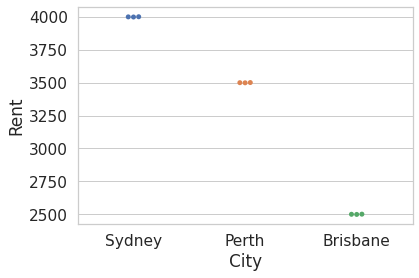

In [56]:
sns.swarmplot(x="City", y="Rent", data=df);

In [57]:
print('One-hot encoding weights: ' ,w1, ' and intercept: ', b1)
print('Dummy encoding weights: ' ,w2, ' and intercept: ', b2)

One-hot encoding weights:  [ 166.66666667  666.66666667 -833.33333333]  and intercept:  3333.3333333333335
Dummy encoding weights:  [1000. 1500.]  and intercept:  2500.0


In [58]:
dummy_df.head(2)

,Rent,city_Perth,city_Sydney
0,3999,0,1
1,4000,0,1


In [59]:
# geometry of one-hot vs. dummy encoding

# Create a list of values in the best fit line for one-hot encoding
one_hot_y = [((w1[0] * one_hot_df.city_Perth[i]) + 
              (w1[1] * one_hot_df.city_Sydney[i]) +
              (w1[2] * one_hot_df.city_Brisbane[i]) + b1) 
             for i in range(0,one_hot_df.shape[0])]

# Create a list of values in the best fit line for dummy coding
dummy_y = [((w2[0] * dummy_df.city_Perth[i]) +
            (w2[1] * dummy_df.city_Sydney[i]) + b2)
           for i in range(0,dummy_df.shape[0])]

print(one_hot_y)
print(dummy_y)

[4000.0000000000005, 4000.0000000000005, 4000.0000000000005, 3500.0, 3500.0, 3500.0, 2500.0, 2500.0, 2500.0]
[4000.000000000001, 4000.000000000001, 4000.000000000001, 3500.0, 3500.0, 3500.0, 2500.0, 2500.0, 2500.0]


# Pros and Cons of Categorical Variable Encodings

One-hot, dummy, and effect coding are very similar to one another. They each have
pros and cons. One-hot encoding is redundant, which allows for multiple valid mod‐
els for the same problem. The nonuniqueness is sometimes problematic for interpre‐
tation, but the advantage is that each feature clearly corresponds to a category.
Moreover, missing data can be encoded as the all-zeros vector, and the output should
be the overall mean of the target variable.

Dummy coding and effect coding are not redundant. They give rise to unique and
interpretable models. The downside of dummy coding is that it cannot easily handle
missing data, since the all-zeros vector is already mapped to the reference category. It
also encodes the effect of each category relative to the reference category, which may
look strange.

Effect coding avoids this problem by using a different code for the reference category,
but the vector of all –1’s is a dense vector, which is expensive for both storage and
computation. For this reason, popular ML software packages such as Pandas and
scikit-learn have opted for dummy coding or one-hot encoding instead of effect
coding.
All three encoding techniques break down when the number of categories becomes
very large. Different strategies are needed to handle extremely large categorical
variables.
